In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "path/to/folder/iiit-d-2021"

In [ ]:
!pwd
!ls -shH

installing the required libraries

In [4]:
import os
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#importing all the required libraries
#from collections import Counter
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import seaborn as sns
sns.set()

# Part 2 -Data preprocessing

Only images of 0-9 had to be choosen, so below code makes a list of the image paths and their labels

In [104]:
# normalizing the data, y_out has labels for all the images
path = "./train/"
dir = os.listdir(path)
print(dir)

imgs = []
labels = []
y_out = []

for d in dir:
  if int(d[6:]) in [j for j in range(1,11)] :  #here folders with 001-011 i.e. 0-9 digits
    #print(d)
    #img_by_dir.append(os.listdir(path + d))
    p = path + d
    imgs = imgs + glob.glob(p + "/*.png")
    l = [int(d[6:])-1]
    labels.append(int(d[6:])-1)
    y_out = y_out + (l*40)
    #print(y_out, "\n")
    #print(len(os.listdir(path + d)))

y_out = np.asarray(y_out)
#print(y_out, "\n")
print(imgs, "\n")
print(len(imgs), "\n")
print(len(y_out))
print(labels)
print(len(labels), "\n")

['Sample039', 'Sample040', 'Sample011', 'Sample057', 'Sample055', 'Sample053', 'Sample046', 'Sample005', 'Sample009', 'Sample061', 'Sample033', 'Sample030', 'Sample034', 'Sample016', 'Sample041', 'Sample018', 'Sample020', 'Sample025', 'Sample028', 'Sample015', 'Sample050', 'Sample058', 'Sample022', 'Sample007', 'Sample062', 'Sample032', 'Sample029', 'Sample054', 'Sample013', 'Sample002', 'Sample012', 'Sample051', 'Sample019', 'Sample004', 'Sample043', 'Sample026', 'Sample017', 'Sample021', 'Sample048', 'Sample035', 'Sample045', 'Sample003', 'Sample037', 'Sample047', 'Sample038', 'Sample027', 'Sample010', 'Sample044', 'Sample024', 'Sample042', 'Sample052', 'Sample049', 'Sample059', 'Sample056', 'Sample023', 'Sample001', 'Sample008', 'Sample014', 'Sample036', 'Sample031', 'Sample006', 'Sample060']
['./train/Sample005/img005-017.png', './train/Sample005/img005-029.png', './train/Sample005/img005-024.png', './train/Sample005/img005-046.png', './train/Sample005/img005-013.png', './train/Sam

Generation of input dataset, resizing the dataset from (600,1920,3) -> (150,200,3) while maintaining the aspect ratio


**imagepx contains the resized, reshaped and normalised image pixels**

In [105]:
#preprocessing
imagepx = []   
for i in imgs:
  #im = cv.imread(i, cv.COLOR_BGR2GRAY)
  im = cv.imread(i, cv.IMREAD_GRAYSCALE)
  r = 200/im.shape[1]
  dim = (200, int(im.shape[0]*r))

  im = cv.resize(im, dim, interpolation=cv.INTER_AREA)
  im = im.astype("float32")
  im = np.asarray(im)
  #im = np.std(im)
  im = im/255
  imagepx.append(im)
  #print(im.dtype)

imagepx = np.asarray(imagepx)
imagepx = imagepx.reshape((imagepx.shape[0], 150, 200, 1))
print(imagepx.shape)
print(imagepx[0].shape)
#print(imagepx[2])
print(len(imagepx))

(400, 150, 200, 1)
(150, 200, 1)
400


In [106]:
print(imagepx[0].shape)

(150, 200, 1)


### the code below can be used to plot 25 images before converting imagepx to numpy array


In [ ]:

"""#print(imagepx[41])
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    #images = cv.imread(imgs[i])
    plt.imshow(imagepx[i] , cmap=plt.get_cmap('gray'))
    #print(imagepx[i].shape)
    #plt.xlabel(imgs[i][14:])
plt.show()
"""

to see only 1 image, pass that image pixels

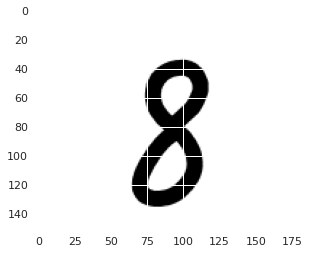

In [39]:
plt.imshow(imagepx[40], cmap=plt.get_cmap('gray'))

### **Trial 1, Model-1 building with input shape as (150,240,3)**

In [107]:
y = to_categorical(y_out)
print(type(y))
print(len(y))

<class 'numpy.ndarray'>
400


In [108]:
print(y[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [109]:
X_train, X_v, y_train, y_v = train_test_split(imagepx,y,test_size = 0.25,train_size =0.75, random_state=42, shuffle=True)

print(X_train)

[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

In [110]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_v = np.asarray(X_v)
y_v = np.asarray(y_v)

In [111]:
print(X_train.shape)
print(y_train.shape)

print(X_v.shape)
print(y_v.shape)

print(y_train)


(300, 150, 200, 1)
(300, 10)
(100, 150, 200, 1)
(100, 10)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#loss, optimiser, metrics, checkpoints saving

epoch = 10
bs = 32
#labels = np.asarray(labels)
num_classes = 10


In [24]:
#cnn model building

input = tf.keras.Input(shape =(150,200,1) )
x = Conv2D(32, 5, 2, padding='valid', activation='relu')(input)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)

x = Conv2D(64, (3,3), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Conv2D(128, (2,2), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Conv2D(256, (1,1), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Flatten()(x)
x = Dense(64,'softmax')(x)
x = Dropout(0.5)(x)
x = Dense(32,'softmax')(x)
x = Dropout(0.5)(x)

x = Dense(10,'softmax')(x)  


In [114]:
tf.keras.backend.clear_session()

In [115]:
model1 = tf.keras.Model(inputs=[input], outputs=[x])

In [116]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 200, 1)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 73, 98, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 73, 98, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 47, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 34, 47, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 34, 47, 64)        256   

In [117]:
#define loss and optimizer
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

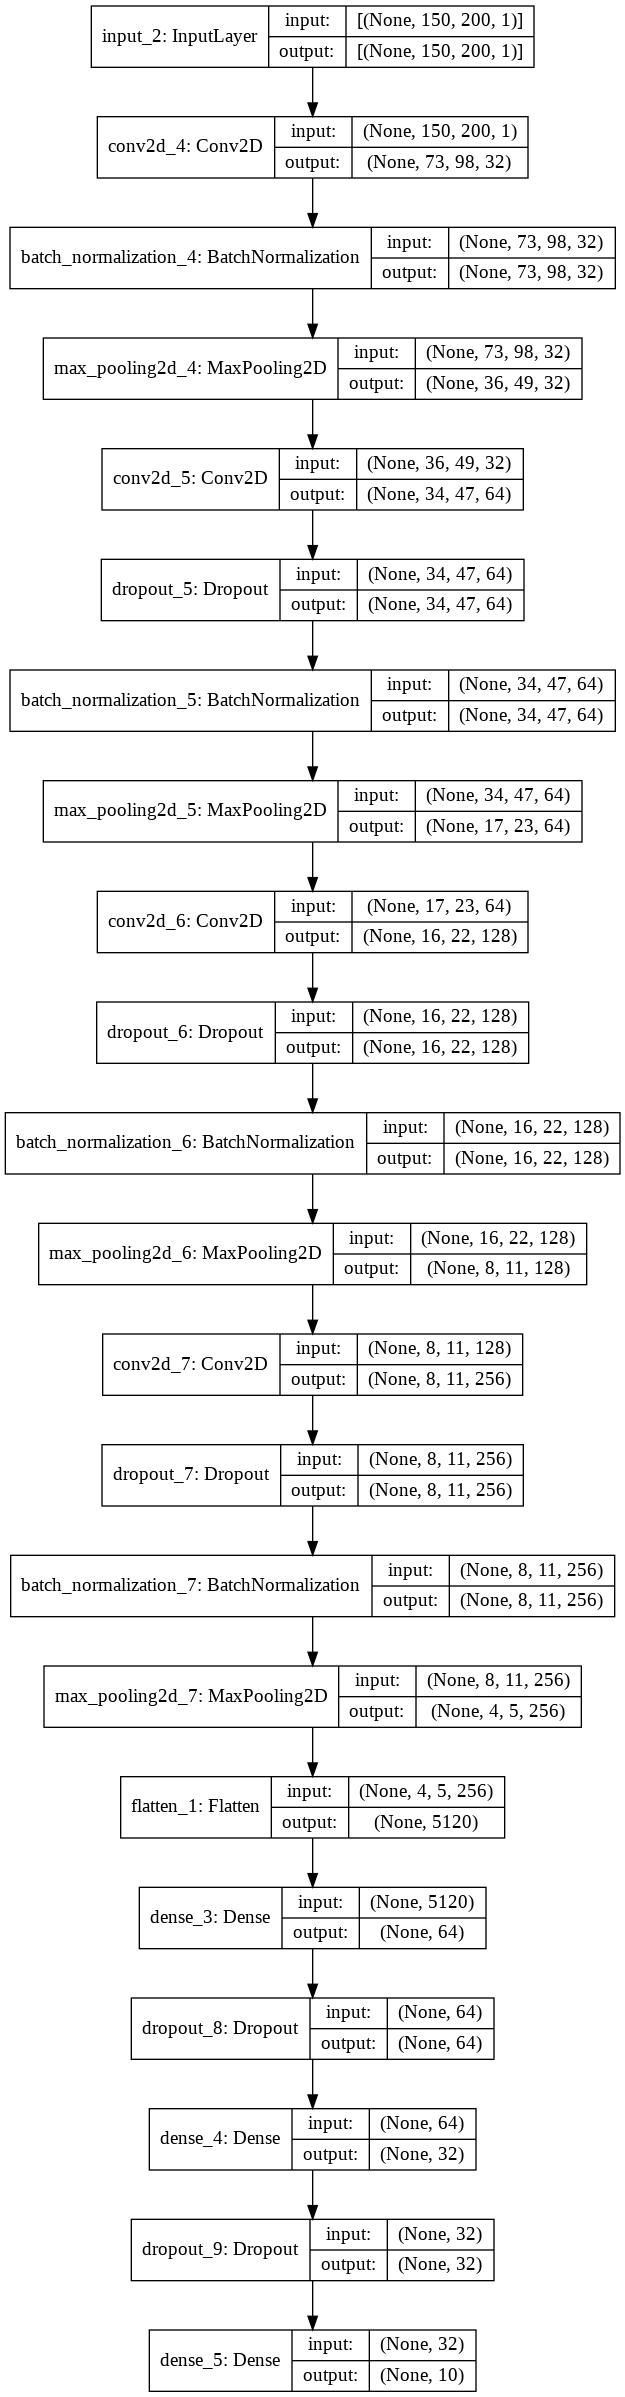

In [119]:
#prints model architecture
plot_model(model1, "task2-2_base.jpg", show_shapes=True, show_layer_names=True)

In [120]:
# Callbacks for model
checkpoint_path = "./training-task2-2_base/checkpoints_task2-2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [EarlyStopping(patience=4, monitor='val_accuracy'), 
              ReduceLROnPlateau(patience=2, verbose=1), 
             cp_callback]

#callbacks = [monitor='val_accuracy'), cp_callback]

In [122]:
#fit the model
history = model1.fit(X_train, y_train, 
                           epochs=epoch,
                           batch_size=bs,
                           callbacks=callbacks,
                           validation_data=(X_v, y_v)
                           )



Epoch 1/10
10/10 [==============================] - 7s 569ms/step - loss: 2.2972 - accuracy: 0.1253 - val_loss: 2.3077 - val_accuracy: 0.1100

Epoch 00001: saving model to ./training-task2-2_base/checkpoints_task2-2.ckpt
Epoch 2/10
10/10 [==============================] - 5s 536ms/step - loss: 2.2967 - accuracy: 0.1248 - val_loss: 2.3086 - val_accuracy: 0.1100

Epoch 00002: saving model to ./training-task2-2_base/checkpoints_task2-2.ckpt
Epoch 3/10
10/10 [==============================] - 5s 541ms/step - loss: 2.3062 - accuracy: 0.1102 - val_loss: 2.3092 - val_accuracy: 0.1100

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: saving model to ./training-task2-2_base/checkpoints_task2-2.ckpt
Epoch 4/10
10/10 [==============================] - 5s 535ms/step - loss: 2.3015 - accuracy: 0.0742 - val_loss: 2.3093 - val_accuracy: 0.1100

Epoch 00004: saving model to ./training-task2-2_base/checkpoints_task2-2.ckpt
Epoch 5/10
10/10 [================

Saving the trained model

In [123]:
model1.save('./models/task2-2_base_model_saveD_model')

INFO:tensorflow:Assets written to: task2-2_base_model_saveD_model/assets


In [124]:
model1.save('./models/task2-2_base_model.h5')

In [ ]:
pd.DataFrame(history.history).plot()     

plot loss and accuracy during training


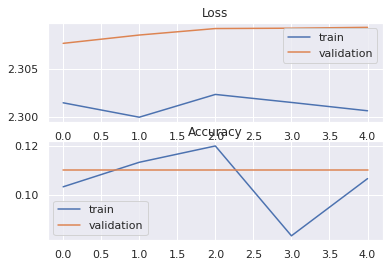

In [127]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
	# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

**results are worst due to less data i.e. 400 images for 4 convolutional layers**

### preprocessing mnist training data i.e. 60000 images, was not able to do since whole ram was used and session crashed


Using tensorflow splits

In [8]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print(trainX.shape)
print(trainX[0].shape)
print(trainY.shape)

print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(28, 28)
(60000,)
(10000, 28, 28)
(10000,)


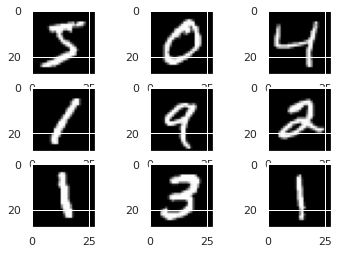

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [17]:
print(x_train.shape)

(150, 150, 200, 1)


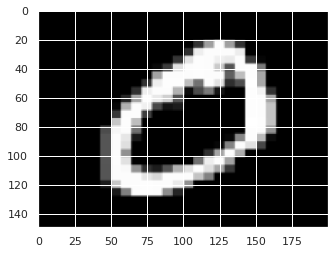

In [ ]:
#preprocessing mnist data
mnist_trainX = []   
for im in trainX:

  im = cv.resize(im, (200,150), interpolation=cv.INTER_AREA)
  im = im.astype("float32")
  im = np.asarray(im)
  #im = np.std(im)
  im = im/255
  mnist_trainX.append(im)
  #print(im.dtype) 
  #plt.imshow(im, cmap=plt.get_cmap('gray'))

#print(imagepx[2])
#print(len(imagepx))

#below image is trial to see how mnist image looks when it is stretched to (150,200)

This is a single image resized to (200,200) to see what effects are seen when mnist images are stretched out


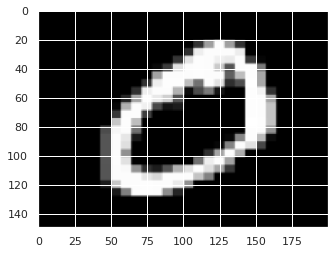

In [ ]:
im2 = cv.resize(im, (200,200), interpolation=cv.INTER_AREA)
plt.imshow(im, cmap=plt.get_cmap('gray'))


**preprocessing mnist training data i.e. 60000 images, was not able to do since whole ram was used and session crashed**

In [ ]:
mnist_trainX = []   
for im in trainX:
  im = cv.resize(im, (200,150), interpolation=cv.INTER_AREA)
  im = im.astype("float32")
  im = np.asarray(im)
  #im = np.std(im)
  im = im/255
  mnist_trainX.append(im)
  #print(im.dtype) 
  #plt.imshow(im, cmap=plt.get_cmap('gray'))

mnist_trainX = np.asarray(mnist_trainX)
mnist_trainX = mnist_trainX.reshape((mnist_trainX.shape[0], 150, 200, 1))
print(imamnist_trainXgepx.shape)
print(mnist_trainX[0].shape)
#print(imagepx[2])
print(len(mnist_trainX))

### Trial 2- While trying out things, I came across this data generator function, to be used to resize mnist data from (28,28) -> (150,200) in size

In [ ]:
# example of progressively loading images from file
# source https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('data/train/', class_mode='binary')
val_it = datagen.flow_from_directory('data/validation/', class_mode='binary')
test_it = datagen.flow_from_directory('data/test/', class_mode='binary')
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

### Trial 3- using standard mnist splits

These files were downloaded to be used with data generator function

In [22]:
!gzip -d ./mnist_dataset/train-images-idx3-ubyte.gz
!gzip -d ./mnist_dataset/train-labels-idx1-ubyte.gz
!gzip -d ./mnist_dataset/t10k-images-idx3-ubyte.gz
!gzip -d ./mnist_dataset/t10k-labels-idx1-ubyte.gz

In [24]:
!pip install python-mnist


below code is just for trial 

In [30]:
from mnist import MNIST

mndata = MNIST('./mnist_dataset')

images, labels = mndata.load_training()
# or
#images, labels = mndata.load_testing()

In [31]:
print(len(images))
print(len(labels))

60000
60000


In [20]:
sz = cv.resize(trainX, (200,150), interpolation=cv.INTER_AREA)
print(sz.shape)

(150, 200, 28)


### functions below prep_pixels was taken from https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

for preprocessing mnist data

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [86]:
print(type(trainY))

<class 'numpy.ndarray'>


pre-trained model-1 whose weights and checkpoints are saved, to be used on mnist data . Size of input used was (28,28,1) so it gave an error.

In [87]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [90]:
print(trainY.shape)
print(trainY[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Was about to use mnist data after resizing and preprocessing but since was not able to resize all the images to (150,200) (due to insufficeint ram), the part is left untouched here

In [21]:
#cnn model building

input = tf.keras.Input(shape =(150,200,1) )
x = Conv2D(32, 5, 2, padding='valid', activation='relu')(input)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)

x = Conv2D(64, (3,3), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Conv2D(128, (2,2), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Conv2D(256, (1,1), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Flatten()(x)
x = Dense(64,'softmax')(x)
x = Dropout(0.5)(x)
x = Dense(32,'softmax')(x)
x = Dropout(0.5)(x)

x = Dense(10,'softmax')(x)  


In [ ]:
tf.keras.backend.clear_session()

finally I wanted to train the base model again but with images(alphabets,digits) of size (28,28) grayscale and use that model for mnist dataset

The below error encountered since I was trying to use code of the above pre-trained model-1 whose weights and checkpoints are saved, to be used on mnist data . Size of input used was (28,28,1) so it gave an error <- A trial

In [25]:
#input = tf.keras.Input(shape =(28,28,1) )
model1 = tf.keras.Model(inputs=[input], outputs=[x])

ValueError: ignored

Below is the code that has not been executed

In [ ]:
model1.summary()

In [ ]:
model1 = load_model()

In [ ]:
#define loss and optimizer
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Callbacks for model
checkpoint_path = "./training-task2-2_mnist/checkpoints_task2-2_mnist.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [EarlyStopping(patience=4, monitor='val_accuracy'), 
              ReduceLROnPlateau(patience=2, verbose=1), 
             cp_callback]

#callbacks = [monitor='val_accuracy'), cp_callback]

In [ ]:
#fit the model
history = model1.fit(X_train, y_train, 
                           epochs=epoch,
                           batch_size=bs,
                           callbacks=callbacks,
                           validation_data=(X_v, y_v)
                           )



In [ ]:
pd.DataFrame(history.history).plot()     

plot loss and accuracy during training


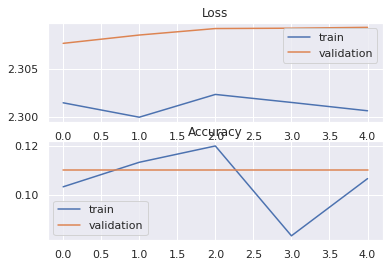

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
	# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()